<a href="https://colab.research.google.com/github/Himkeshtak/Deep-Learning/blob/main/CIFAR_10_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


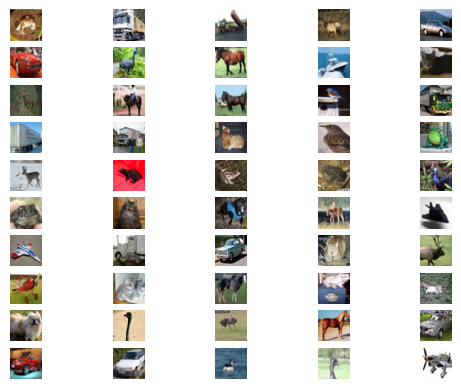

In [1]:
#example of loading and plotting the cifar10 dataset
from keras.datasets.cifar10 import load_data
from matplotlib import pyplot

#load the images into memory
(trainX, trainY), (testX, testY) = load_data()

#plot images form the training dataset
for i in range(50):

  #define subplot
  pyplot.subplot(10, 5, 1+i)

  #turn off the acxis
  pyplot.axis('off')

  #plot raw pixel data
  pyplot.imshow(trainX[i])
pyplot.show()


In [2]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [5]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from tensorflow.keras.utils import plot_model
import numpy as np


In [ ]:
#define the standalone discriminator model
def define_discriminator(in_shape=(32,32,3)):
  model = Sequential()

  #normal
  model.add(Conv2D(64, (3,3), padding='same', input_shape=in_shape))
  model.add(LeakyReLU(alpha=0.2))

  #downsample
  model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  #downsample
  model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  #downsample
  model.add(Conv2D(256, (3,3), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  #classifier
  model.add(Flatten())
  model.add(Dropout(0.4))

